In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf 

THIS MODEL WILL USE THE DIABETES DATASET AND ALSO USE EVERYTHING I'VE LEARNED FROM THE SUPERVOSED LEARNING  DATAcamp course

In [2]:
#load data
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


    DATA PREPOSSESING 

In [3]:
#LOOKING FOR NULL VALUES IN COLUMNS WHERE CANT BE NULL 
df.isna().sum().sort_values()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
print(len(df))
#dropping Zero values for Glucose , bloodpressure, Bmi, age
df=df[(df['Age']!=0) & (df['BMI']!=0 ) &  ( df['Glucose']!=0  ) &( df['BloodPressure']!=0)]
print(len(df))

768
724


In [5]:
# CREATING THE DATA SET
from sklearn.model_selection import train_test_split
Y=df['Outcome']
X=df.drop('Outcome',axis=1)
X_train,X_test, y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=666)


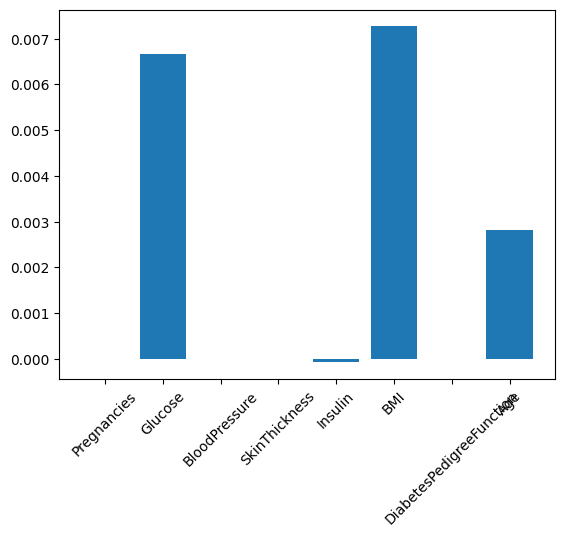

In [6]:
#seeing which data has mroe weight 
from sklearn.linear_model import Lasso
model_l=Lasso(alpha=.4)
model_l.fit(X_train,y_train)

lasso_coef = model_l.coef_
colums=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI'	,'DiabetesPedigreeFunction','Age']
plt.bar(colums, lasso_coef)
plt.xticks(rotation=45)
plt.show()
#print(sales)

In [7]:
#USING A PIPELINE TO MAKE EVERYTHING 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

model={'lasso':Lasso(),'regression':LogisticRegression(),'tree':DecisionTreeClassifier(),'knn':KNeighborsClassifier  ,'linear':LinearRegression   }



LogisticRegression


In [8]:
step_1=[('scale',StandardScaler()),
      ('logreg',LogisticRegression(max_iter=700))
]

parameter_1={'logreg__C':np.linspace(.001,1,30)}
parameter_N1={'C':np.linspace(.001,1,30)}

pipe_1=Pipeline(step_1)
pipe_N1=LogisticRegression(max_iter=700)
Grid_s=GridSearchCV(pipe_1,param_grid=parameter_1)
Grid_s_NOSCALE= GridSearchCV(pipe_N1,param_grid=parameter_N1)
Grid_s.fit(X_train,y_train)
Grid_s_NOSCALE.fit(X_train,y_train)
kf=KFold(n_splits=5,shuffle=True,random_state=666)
cv_score=cross_val_score(Grid_s,X_test,y_test,cv=kf)


In [9]:
print(Grid_s.score(X_test,y_test))
print(cv_score)
print(cross_val_score(Grid_s,X_train,y_train,cv=kf))

0.7586206896551724
[0.68965517 0.86206897 0.75862069 0.68965517 0.65517241]
[0.78448276 0.76724138 0.77586207 0.73275862 0.77391304]


In [10]:
#mode_regression=cross_validate(Grid_s,X_train,y_train,cv=kf)

#print(mode_regression)
result=[]
result.append([Grid_s.score(X_test,y_test),Grid_s_NOSCALE.score(X_test,y_test) ])
result


[[0.7586206896551724, 0.7655172413793103]]